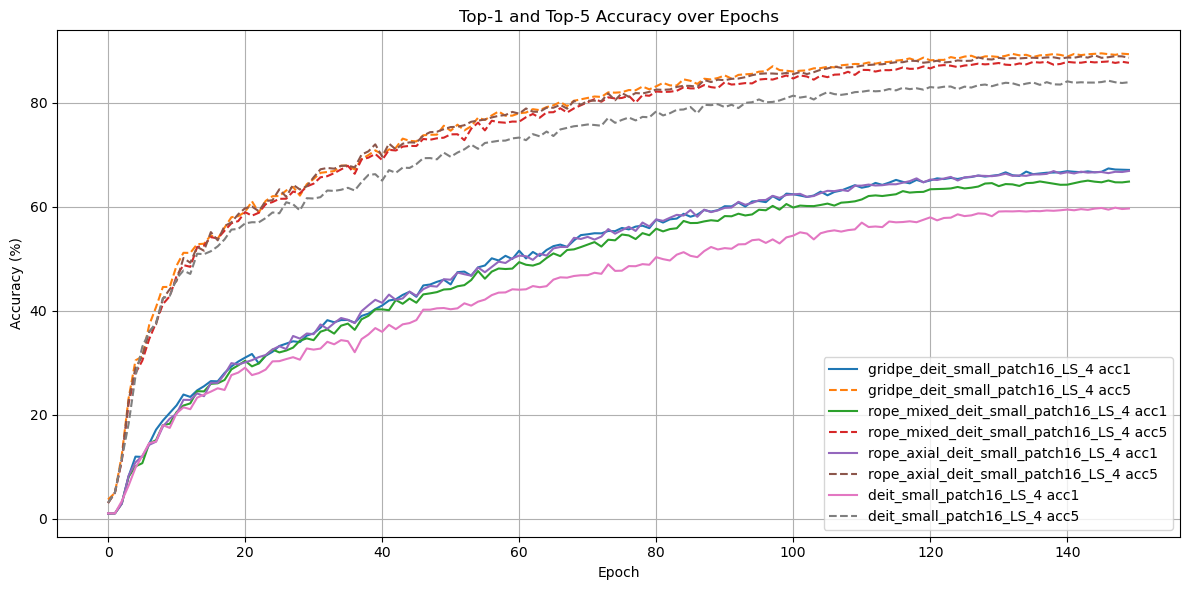

In [2]:
import os
import json
import matplotlib.pyplot as plt

# Base directory where model logs are stored
base_path = "./eval_results_150_epoch"

# List of model names to be evaluated
models = [
    "gridpe_deit_small_patch16_LS_4",
    "rope_mixed_deit_small_patch16_LS_4",
    "rope_axial_deit_small_patch16_LS_4",
    "deit_small_patch16_LS_4"    
]

# Dictionary to store accuracy results
results = {}

# Parse log.txt for each model to extract Top-1 and Top-5 accuracy per epoch
for model in models:
    log_path = os.path.join(base_path, model, 'pretrain',"log.txt")
    acc1_list = []
    acc5_list = []

    with open(log_path, "r") as f:
        for line in f:
            if line.strip():
                entry = json.loads(line)
                acc1_list.append(entry.get("test_acc1", 0))
                acc5_list.append(entry.get("test_acc5", 0))

    results[model] = {
        "acc1": acc1_list,
        "acc5": acc5_list
    }

# Plotting the results
plt.figure(figsize=(12, 6))

# Draw Top-1 and Top-5 accuracy curves for each model
for model, data in results.items():
    epochs = list(range(len(data["acc1"])))
    plt.plot(epochs, data["acc1"], label=f"{model} acc1")
    plt.plot(epochs, data["acc5"], label=f"{model} acc5", linestyle="--")

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Top-1 and Top-5 Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Base directory where model logs are stored
base_path = "./eval_results_150_epoch"

# List of model names to be evaluated
models = [
    "gridpe_deit_small_patch16_LS_4",
    "rope_mixed_deit_small_patch16_LS_4",
    "rope_axial_deit_small_patch16_LS_4",
    "deit_small_patch16_LS_4"    
]

# List of input sizes used during evaluation
input_sizes = [160, 192, 224, 256, 320, 384, 448, 512]

# Dictionary to store results for each model
results = {model: {"acc1": {}, "acc5": {}} for model in models}

# Read evaluation results from txt files
for model in models:
    for size in input_sizes:
        txt_path = os.path.join(base_path, model, "evaluation", str(size), "eval_results.txt")
        if os.path.exists(txt_path):
            with open(txt_path, "r") as f:
                lines = f.readlines()
                acc1 = None
                acc5 = None
                for line in lines:
                    if "acc1" in line:
                        acc1 = float(line.split("acc1:")[1].strip())
                    if "acc5" in line:
                        acc5 = float(line.split("acc5:")[1].strip())
                results[model]["acc1"][size] = acc1
                results[model]["acc5"][size] = acc5
        else:
            results[model]["acc1"][size] = None
            results[model]["acc5"][size] = None

# Build accuracy tables
acc1_table = pd.DataFrame(index=input_sizes, columns=models)
acc5_table = pd.DataFrame(index=input_sizes, columns=models)

for model in models:
    for size in input_sizes:
        acc1_table.at[size, model] = results[model]["acc1"].get(size)
        acc5_table.at[size, model] = results[model]["acc5"].get(size)

# Combine and format as markdown
print("\n### 📊 Top-1 Accuracy")
print(acc1_table.to_markdown())

print("\n### 📊 Top-5 Accuracy")
print(acc5_table.to_markdown())


### 📊 Top-1 Accuracy
|     |   gridpe_deit_small_patch16_LS_4 |   rope_mixed_deit_small_patch16_LS_4 |   rope_axial_deit_small_patch16_LS_4 |   deit_small_patch16_LS_4 |
|----:|---------------------------------:|-------------------------------------:|-------------------------------------:|--------------------------:|
| 160 |                            57.24 |                                55.16 |                                55.68 |                     49.7  |
| 192 |                            63.42 |                                61.78 |                                63.32 |                     56.06 |
| 224 |                            67.34 |                                65.02 |                                66.9  |                     59.82 |
| 256 |                            68.54 |                                65.76 |                                67.96 |                     60.54 |
| 320 |                            67.2  |                                64.82 |   

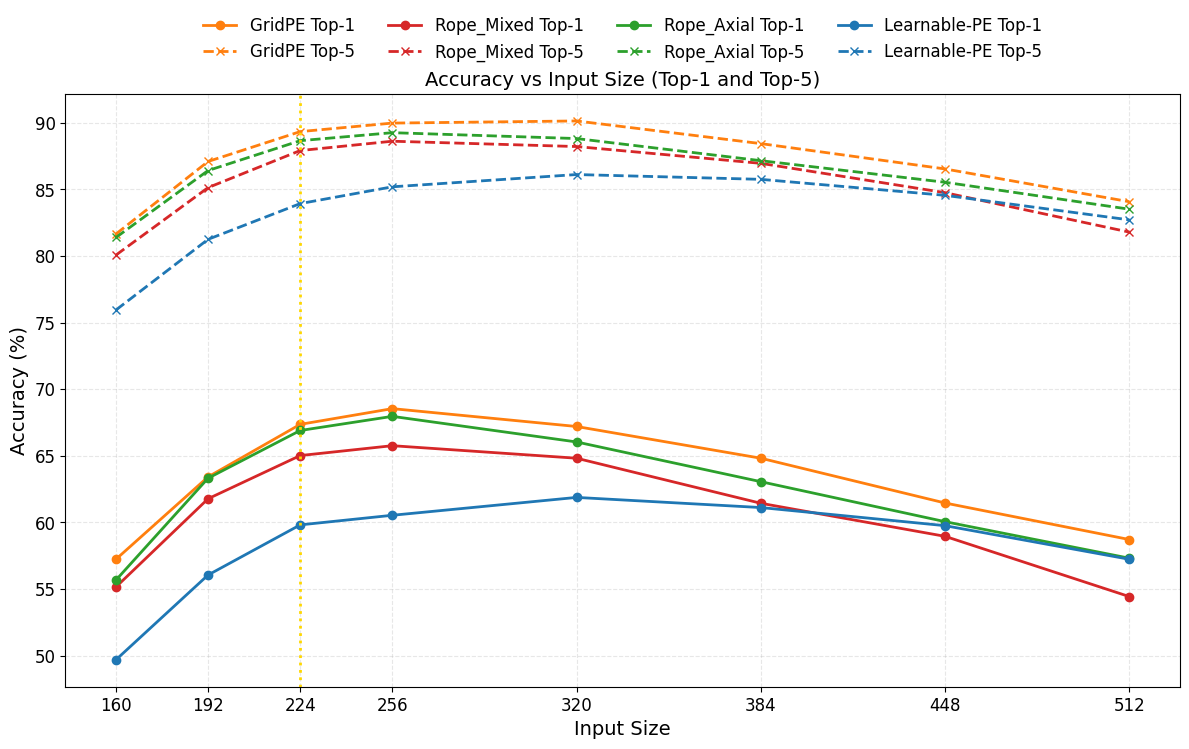

In [ ]:
import os
import matplotlib.pyplot as plt

base_path =  "./eval_results"
# List of model names to evaluate
models = [
    "gridpe_deit_small_patch16_LS_4",
    "rope_mixed_deit_small_patch16_LS_4",
    "rope_axial_deit_small_patch16_LS_4",
    "deit_small_patch16_LS_4"    
]

# Mapping: model path name -> short name for legend
short_names = {
    "deit_small_patch16_LS_4": "Learnable-PE",
    "gridpe_deit_small_patch16_LS_4": "GridPE",
    "rope_axial_deit_small_patch16_LS_4": "Rope_Axial",
    "rope_mixed_deit_small_patch16_LS_4": "Rope_Mixed"
}

# Fixed colors for each model
colors = {
    "Learnable-PE": "#1f77b4",        # blue
    "GridPE": "#ff7f0e",     # orange
    "Rope_Axial": "#2ca02c", # green
    "Rope_Mixed": "#d62728"  # red
}

input_sizes = [160, 192, 224, 256, 320, 384, 448, 512]

# Dictionary to store results
results = {model: {"acc1": {}, "acc5": {}} for model in models}

# Read data
for model in models:
    for size in input_sizes:
        txt_path = os.path.join(base_path,model, "evaluation", str(size), "eval_results.txt")
        if os.path.exists(txt_path):
            with open(txt_path, "r") as f:
                lines = f.readlines()
                acc1 = None
                acc5 = None
                for line in lines:
                    if "acc1" in line:
                        acc1 = float(line.split("acc1:")[1].strip())
                    if "acc5" in line:
                        acc5 = float(line.split("acc5:")[1].strip())
                results[model]["acc1"][size] = acc1
                results[model]["acc5"][size] = acc5
        else:
            results[model]["acc1"][size] = None
            results[model]["acc5"][size] = None

# --- Plotting ---
plt.figure(figsize=(12, 8))

# Plot Top-1 and Top-5 with fixed colors
for model in models:
    short = short_names[model]
    acc1_values = [results[model]["acc1"].get(size) for size in input_sizes]
    acc5_values = [results[model]["acc5"].get(size) for size in input_sizes]
    plt.plot(input_sizes, acc1_values, marker='o', color=colors[short], label=f"{short} Top-1", linewidth=2)
    plt.plot(input_sizes, acc5_values, marker='x', linestyle='--', color=colors[short], label=f"{short} Top-5", linewidth=2)

# Vertical line at 224
plt.axvline(x=224, color='gold', linestyle=':', linewidth=2)
# plt.text(226, plt.ylim()[1]*0.95, "224", color='gray', fontsize=12)

# Titles and labels
plt.title("Accuracy vs Input Size (Top-1 and Top-5)", fontsize=14)
plt.xlabel("Input Size", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xticks(input_sizes, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Legend on top outside
plt.legend(ncol=4, loc='lower center', bbox_to_anchor=(0.5, 1.03), fontsize=12, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for legend
plt.savefig("accuracy_vs_inputsize.png", dpi=300, bbox_inches='tight')
plt.show()